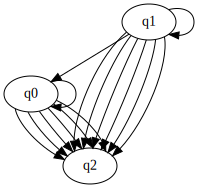

In [6]:
# %load_ext autoreload
%autoreload 2
import pdfa

pdfa = pdfa.PDFA(configFileName='config/pdfa_self_driving_config.yaml')

numSamples = int(1e3)
samples, stringLengths = pdfa.generateTraces(numSamples)

fName = 'PDFASamples_train.swag'
pdfa.writeSamplesToFile(fName, samples, numSamples, stringLengths)

pdfa.drawIPython()

# Flexfringe Usage

Two choices: Using it via Python function calls, or working with the command line.

## Step 1

Install all dependencies and compile flexfringe (development branch due to some technicalities using WIFEXITED macro used for the SAT solver's process)

In [ ]:
# for the C++ code
!apt install graphviz
!apt install libgsl-dev
!apt install libpopt-dev

# for visualization and notebook interface
!pip install graphviz

# Stamina data
!wget http://stamina.chefbe.net/downloads/grid.tar.gz
!tar xfz grid.tar.gz

# cloning the repository
!rm -rf dfasat
!git clone https://bitbucket.org/chrshmmmr/dfasat.git

In [ ]:
# building the repository
# it is important to check out the development branch on colab
!cd dfasat && git checkout  && make clean all

## Step 2 
Provide simple command line wrappers

In [2]:
import subprocess
import sys
import graphviz

from IPython.display import Image, display

def flexfringe(*args, **kwargs):
  
  command = ["--help"]

  if(len(kwargs) > 1):
    command = []
    for key in kwargs:
      command += ["-" + key + "=" + kwargs[key]]

  print("%s" % subprocess.run(["dfasat/flexfringe",] + command + [args[0]], stdout=subprocess.PIPE).stdout.decode())
  
  
  try:
    with open("dfafinal.dot") as fh:
      return fh.read()
  except FileNotFoundError:
    pass
  
  return "No output file was generated."



def show(data):
  if data=="":
    pass
  else:
    g = graphviz.Source(data, format="png")
    g.render()
    display(Image(g.render()))
 

In [ ]:
!ls dfasat/data/staminadata

## Step 3

call the flexfringe function with the filename and named arguments just as described in help. Mind that "heuristic-name" is actually an expression, not a valid name. Use the short form in this case.

The flexringe() call returns a string with the dot output.

In [3]:
data = flexfringe("PDFASamples_train.swag", h="alergia", d='alergia_data')

FileNotFoundError: [Errno 2] No such file or directory: 'dfasat/flexfringe'

## Step 4
Visualize the output by feeding the dot string to the show() function.

In [ ]:
show(data)

## Step 5

Compare with a direct command line. Each cell can act as a shell by prepending a bang ! to the commands.

In [ ]:
# !dfasat/flexfringe -h=overlap_driven -d=overlap_data /content/grid/1_training.txt 
!dfasat/flexfringe --help

In [ ]:
!dot -Tpng dfafinal.dot > outfile.png

## Step 6

Visualize the files using inline Python calls, e.g. display and Image

In [ ]:
display(Image("outfile.png"))